# Introducción a regresión lineal
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [1]:
!pip install --upgrade pip setuptools==57.5.0
!pip install regressors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.20.0 requires setuptools>=60.0.0, but you have setuptools 57.5.0 which is incompatible.
pytensor 2.27.1 requires setuptools>=59.0.0, but you have setuptools 57.5.0 which is incompatible.


  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12398 sha256=92f65d82c04bfaba18b54328d939e90fdf72111ed9ac5d539b0e20acc00f9ebb
  Stored in directory: /root/.cache/pip/wheels/79/3d/27/e8e542814a63e39bd87a335aca693a993bcf262a3476af9991
Successfully built regressors


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')

## Entendiendo los datos

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando Datos

(1338, 7)


<Axes: >

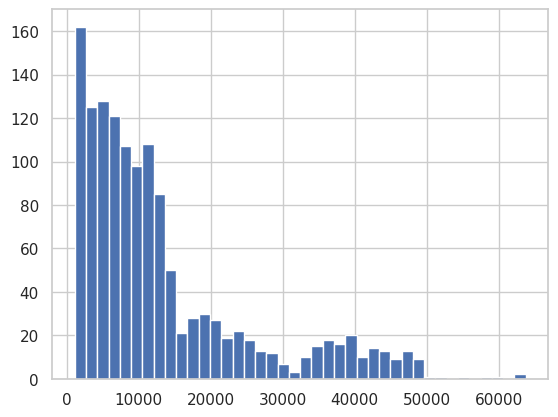

In [4]:
print(df.shape)
df.charges.hist(bins = 40)

In [5]:
#df[df.charges>50000]
df = df[df.charges<50000]

## Análisis de resultados

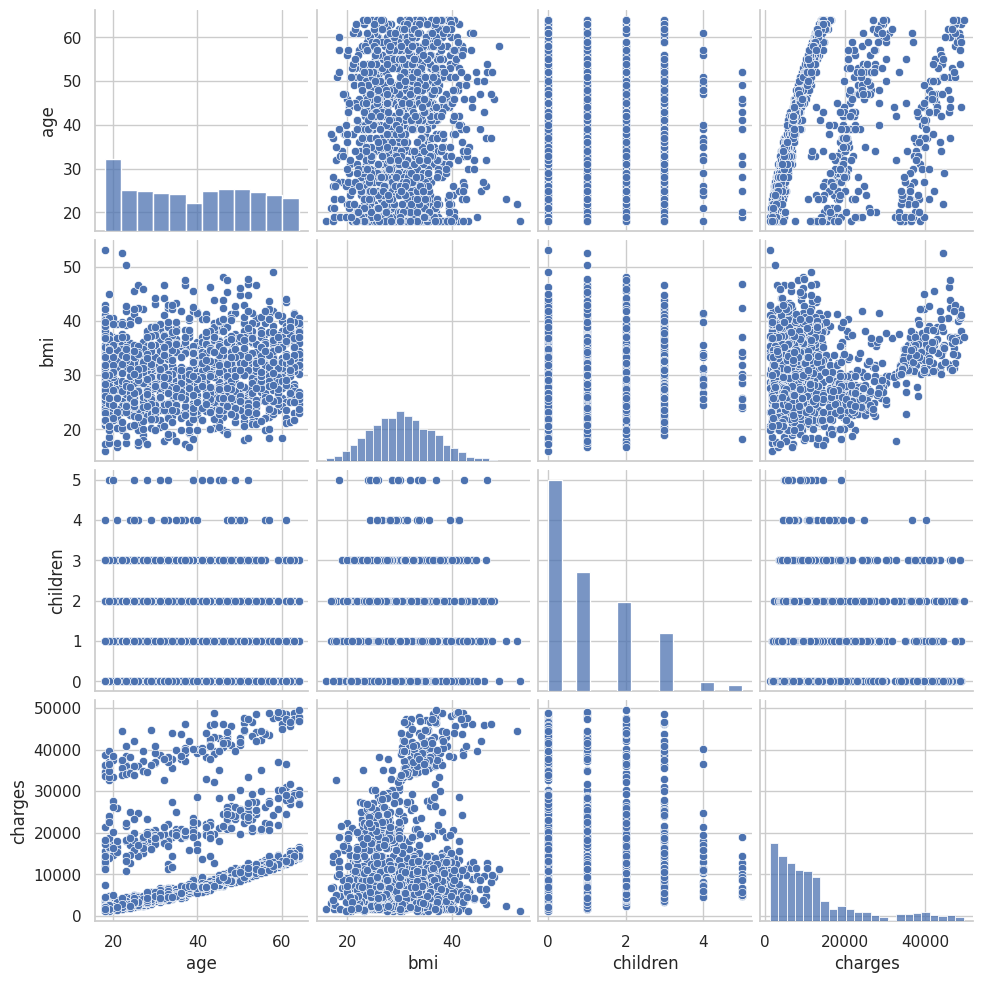

In [6]:
sns.pairplot(df)

<Axes: >

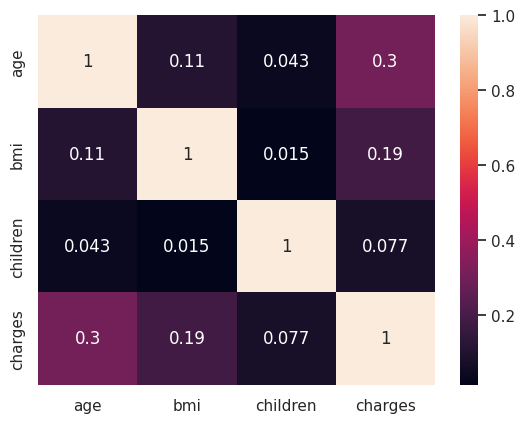

In [79]:
numeric_cols = ['age','bmi','children','charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.heatmap(cm,annot=True,yticklabels=numeric_cols, xticklabels=numeric_cols)

## Utilizado las demas variables

In [10]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
x_cols = list(set(df.columns)-set(['charges']))
y_cols = ['charges']

x=df[x_cols].values
y=df[y_cols].values

x_train, x_test, y_train, y_test = train_test_split(x,y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [36]:
y_pred.shape

(333, 1)

## Funciones de Métricas

In [73]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ',round(r2,4),' \n mse: ',round(mse,4))

r2:  0.7802  
 mse:  0.2133


In [74]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [76]:
y_test = y_test.reshape(-1)
print('###############Summary################')
stats.summary(model, x_test, y_test, x_cols)

###############Summary################
Residuals:
    Min      1Q  Median     3Q    Max
-2.0009 -0.0617  0.0902 0.2498 0.9055


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.003139    0.025461   0.1233  0.901957
region_southwest -0.024052    0.029161  -0.8248  0.410074
age               0.324865    0.025818  12.5830  0.000000
children          0.047532    0.026852   1.7702  0.077616
smoker_yes        0.782320    0.026518  29.5012  0.000000
sex_male         -0.009747    0.025574  -0.3812  0.703336
region_southeast -0.020851    0.030089  -0.6930  0.488792
bmi               0.154018    0.025288   6.0906  0.000000
region_northwest -0.005068    0.029784  -0.1702  0.864980
---
R-squared:  0.78025,    Adjusted R-squared:  0.77482
F-statistic: 143.80 on 8 features


<function matplotlib.pyplot.show(close=None, block=None)>

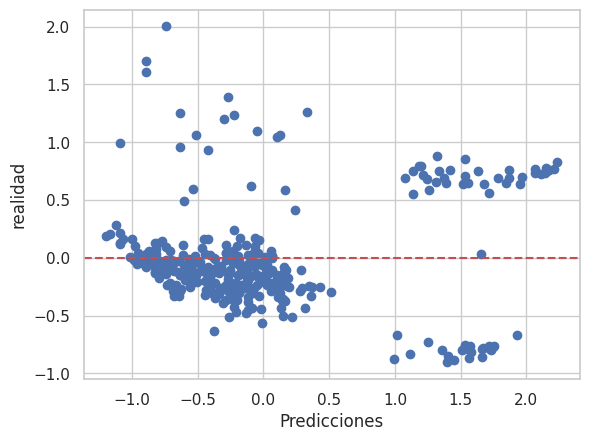

In [89]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('realidad')
plt.show

## Segundo Modelo

In [104]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes

In [105]:
x_cols = list(set(df_second.columns)-set(['charges']))
y_cols = ['charges']

x=df_second[x_cols].values
y=df_second[y_cols].values

x_train, x_test, y_train, y_test = train_test_split(x,y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [106]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ',round(r2,4),' \n mse: ',round(mse,4))

r2:  0.851  
 mse:  0.1315


In [107]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [108]:
y_test = y_test.reshape(-1)
print('###############Summary################')
stats.summary(model, x_test, y_test, x_cols)

###############Summary################
Residuals:
    Min     1Q  Median     3Q    Max
-1.8272 0.0528  0.1042 0.1472 0.3185


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.001467    0.019992   0.0734  0.941538
region_southwest  -0.053699    0.022362  -2.4013  0.016886
age                0.004636    0.101183   0.0458  0.963479
children           0.069987    0.019244   3.6368  0.000320
smoker_yes         0.454161    0.027453  16.5432  0.000000
sobrepeso*fumador  0.502431    0.029369  17.1076  0.000000
sobrepeso         -0.059851    0.029765  -2.0108  0.045155
sex_male          -0.017454    0.020007  -0.8724  0.383628
region_southeast  -0.051432    0.024425  -2.1057  0.035978
age2               0.319806    0.102417   3.1226  0.001950
bmi                0.071985    0.029884   2.4088  0.016551
region_northwest  -0.026278    0.023197  -1.1328  0.258116
---
R-squared:  0.85097,    Adjusted R-squared:  0.84586
F-statistic: 166.63 on 11 features


<function matplotlib.pyplot.show(close=None, block=None)>

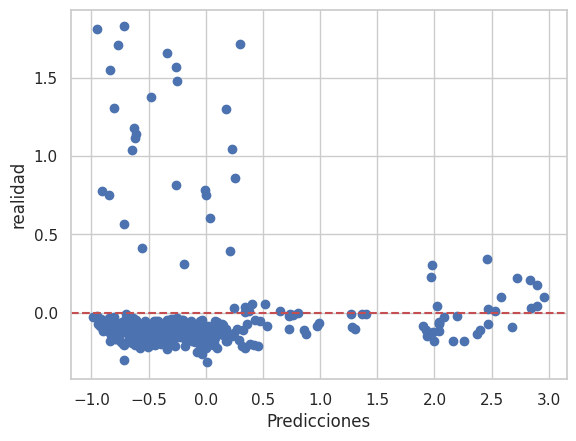

In [109]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('realidad')
plt.show

In [122]:
x_cols = ['children','sobrepeso*fumador','smoker_yes','age2']
y_cols = ['charges']

x=df_second[x_cols].values
y=df_second[y_cols].values

x_train, x_test, y_train, y_test = train_test_split(x,y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [123]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ',round(r2,4),' \n mse: ',round(mse,4))

r2:  0.8653  
 mse:  0.1363


In [126]:
model.coef_ = model.coef_.reshape(-1)

In [127]:
y_test = y_test.reshape(-1)
print('###############Summary################')
stats.summary(model, x_test, y_test, x_cols)

###############Summary################
Residuals:
    Min     1Q  Median     3Q    Max
-1.9222 0.0733  0.1105 0.1347 0.2978


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.020290   0.0000  1.000000
children           0.069003    0.019525   3.5341  0.000467
sobrepeso*fumador  0.495258    0.026305  18.8277  0.000000
smoker_yes         0.462790    0.028084  16.4786  0.000000
age2               0.316783    0.020227  15.6618  0.000000
---
R-squared:  0.86533,    Adjusted R-squared:  0.86369
F-statistic: 526.91 on 4 features


<function matplotlib.pyplot.show(close=None, block=None)>

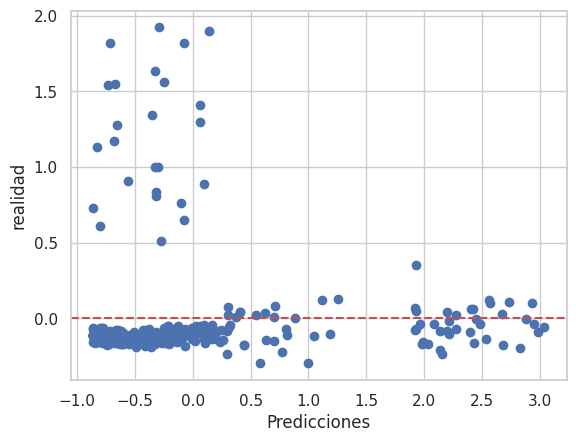

In [128]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('realidad')
plt.show